<a href="https://colab.research.google.com/github/Yotty0404/A-Puzzle-A-Day-Solver/blob/main/A_Puzzle_A_Day_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Union-Find木**
---

In [8]:
from collections import defaultdict
class UnionFind():
    def __init__(self, n):
        self.n = n
        self.parents = [-1] * n

    def find(self, x):
        if self.parents[x] < 0:
            return x
        else:
            self.parents[x] = self.find(self.parents[x])
            return self.parents[x]

    def union(self, x, y):
        x = self.find(x)
        y = self.find(y)

        if x == y:
            return

        if self.parents[x] > self.parents[y]:
            x, y = y, x

        self.parents[x] += self.parents[y]
        self.parents[y] = x

    def size(self, x):
        return -self.parents[self.find(x)]

    def same(self, x, y):
        return self.find(x) == self.find(y)

    def members(self, x):
        root = self.find(x)
        return [i for i in range(self.n) if self.find(i) == root]

    def roots(self):
        return [i for i, x in enumerate(self.parents) if x < 0]

    def group_count(self):
        return len(self.roots())

    def all_group_members(self):
        group_members = defaultdict(list)
        for member in range(self.n):
            group_members[self.find(member)].append(member)
        return group_members

    def __str__(self):
        return '\n'.join(f'{r}: {m}' for r, m in self.all_group_members().items())

---
# **連結成分のサイズを利用**
---

In [ ]:
# 連結成分のサイズを利用

import numpy as np
import datetime
from itertools import product

# ブロックを回転させる関数
def rotate_block(block, num):
    if num == 0:
        return block
    if num == 1:
        return np.rot90(block,1)
    if num == 2:
        return np.rot90(block,2)
    if num == 3:
        return np.rot90(block,3)
    if num == 4:
        block = np.fliplr(block)
        return block
    if num == 5:
        block = np.fliplr(block)
        return np.rot90(block,1)
    if num == 6:
        block = np.fliplr(block)
        return np.rot90(block,2)
    if num == 7:
        block = np.fliplr(block)
        return np.rot90(block,3)

# 重複なく回転パターンを洗い出す関数
def get_rotate_num(block):
    l = []
    num_l = []
    for i in range(8):
        array1 = rotate_block(block,i)
        flag = True
        for array2 in l:
            if array1.shape == array2.shape and np.allclose(array1,array2):
                flag = False
        
        if flag:
            l.append(array1)
            num_l.append(i)
    return num_l

# 次のブロックの位置候補を返す関数
def get_next_postion(block, position):
    if position is None:
        return [0,0]

    max_r = 7-block.shape[0]
    max_c = 7-block.shape[1]

    position[1]+=1

    if position[1] > max_c:
        position[0]+=1
        position[1]=0
    
    if position[0] > max_r:
        return [-1,-1]
    
    return position

# 指定された位置から探索して、ブロックの置く位置を探索する関数
def get_position(board, block, position):
    while 1:
        position = get_next_postion(block, position)
        if position[0] == -1:
            return [-1,-1]
    
        r = position[0]
        c = position[1]

        temp = np.copy(board)
        temp[r:r+block.shape[0],c:c+block.shape[1]] += block

        if(judge_correct_board(temp)):
            return [r,c]

# 残るマスの連結成分のサイズが5の倍数かどうか判定する関数
def judge_connected_component(board):
    uf = UnionFind(49)

    for i in range(7):
        for j in range(7):
            if i != 6 and board[i][j]==board[i+1][j]==0:
                uf.union(i*7+j,(i+1)*7+j)
            if j != 6 and board[i][j]==board[i][j+1]==0:
                uf.union(i*7+j,i*7+j+1)

    for i in range(7):
        for j in range(7):
            if board[i][j]==0 and uf.size(i*7+j)%5!=0:
                return False

    return True

# ボードの状態を見て、継続可能か判定する関数
def judge_correct_board(board):
    if np.amax(board) > 1:
        return False
    if not judge_connected_component(board):
        return False
    return True

# ボードの指定の位置にブロックを置いた時のボードの状態を返す関数
def get_board_state(board, block, position):
    r = position[0]
    c = position[1]
    board[r:r+block.shape[0],c:c+block.shape[1]] += block
    return board

# 現在のボードの状態を返す関数
def get_board_state_by_all_block(initial_board, blocks, positions, block_num):
    board = np.copy(initial_board)
    for i in range(block_num+1):
        board = get_board_state(board, blocks[i],positions[i])
    return board

# 指定したブロックの番号移行の位置を初期化する関数
def clear_block_position(positions, block_num):
    for i in range(block_num+1, 8):
        positions[i] = None
    return positions

def main():
    initial_board =np.array(
                   [[0,0,0,0,0,0,1],
                    [0,0,0,0,0,0,1],
                    [0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0],
                    [0,0,0,1,1,1,1],
                    ])
    
    # ブロックの種類
    initial_blocks = [
        np.array([
            [1, 1, 1],
            [1, 1, 1]]),
        np.array([
            [1, 0, 0],
            [1, 0, 0],
            [1, 1, 1]]),
        np.array([
            [1, 1, 0],
            [0, 1, 0],
            [0, 1, 1]]),
        np.array([
            [1, 0, 1],
            [1, 1, 1]]),
        np.array([
            [0, 0, 0, 1],
            [1, 1, 1, 1]]),
        np.array([
            [0, 0, 1, 1],
            [1, 1, 1, 0]]),
        np.array([
            [0, 0, 1, 0],
            [1, 1, 1, 1]]),
        np.array([
            [1, 1, 0],
            [1, 1, 1]]),
    ]

    #--対象の日付-------------------------------
    date = datetime.date(2000, 1, 1)
    #-------------------------------------------

    # 月の位置を取得
    r = (date.month-1) // 6
    c = (date.month-1) % 6
    initial_board[r][c] = 1

    # 日の位置を取得
    r = (date.day-1) // 7 + 2
    c = (date.day-1) % 7
    initial_board[r][c] = 1

    # 各ブロックの回転パターンを保持
    l_num = []
    for b in initial_blocks:
        l_num.append(get_rotate_num(b))

    start_time = datetime.datetime.now()
    print(start_time)

    cnt = 0
    # 各ブロックの全組み合わせループ
    for l in product(l_num[0], l_num[1], l_num[2], l_num[3], l_num[4], l_num[5], l_num[6], l_num[7]):
        cnt += 1

        #回転させたブロックを保持
        blocks = []
        for i in range(8):
            blocks.append(rotate_block(initial_blocks[i], l[i]))
        
        # 各ブロックの位置を保持するリスト
        positions = [None, None, None, None, None, None, None, None]
        # 現在置く場所を判断しているブロックの番号を保持
        block_num = 0

        board = np.copy(initial_board)

        while 1:
            cnt+=1
            position = get_position(board, blocks[block_num], positions[block_num])

            if position[0] == -1:
                block_num -= 1
                positions = clear_block_position(positions, block_num)

                # ブロックの番号の1つ前までのブロックを置いた状態のボードを取得
                board = get_board_state_by_all_block(initial_board, blocks, positions, block_num-1)

                if block_num == -1:
                    break

                continue
            
            positions[block_num] = position
            board = get_board_state_by_all_block(initial_board, blocks, positions, block_num)

            block_num+=1
            if block_num == 8:
                break

        if block_num == 8:
                break

    end_time = datetime.datetime.now()
    print(end_time)
    t = end_time-start_time
    print(f'探索時間：{t.seconds}秒')
    print(f"探索回数：{cnt}")
    for i in range(8):
        print(positions[i])
        print(blocks[i])
        print()

main()

2021-08-29 05:45:32.202310
2021-08-29 06:07:15.349902
探索時間：1303秒
探索回数：2617745
[4, 1]
[[1 1 1]
 [1 1 1]]

[4, 0]
[[1 0 0]
 [1 0 0]
 [1 1 1]]

[0, 4]
[[1 1 0]
 [0 1 0]
 [0 1 1]]

[3, 5]
[[1 1]
 [0 1]
 [1 1]]

[2, 0]
[[0 0 0 1]
 [1 1 1 1]]

[0, 1]
[[1 1 1 0]
 [0 0 1 1]]

[2, 4]
[[1 0]
 [1 0]
 [1 1]
 [1 0]]

[1, 0]
[[1 1 1]
 [0 1 1]]



---
# **2進数を利用**
---

In [11]:
# 2進数を利用

import numpy as np
import datetime
import time
import pandas as pd
from itertools import product

# ブロックを回転させる関数
def rotate_block(block, num):
    if num == 0:
        return block
    if num == 1:
        return np.rot90(block,1)
    if num == 2:
        return np.rot90(block,2)
    if num == 3:
        return np.rot90(block,3)
    if num == 4:
        block = np.fliplr(block)
        return block
    if num == 5:
        block = np.fliplr(block)
        return np.rot90(block,1)
    if num == 6:
        block = np.fliplr(block)
        return np.rot90(block,2)
    if num == 7:
        block = np.fliplr(block)
        return np.rot90(block,3)

# 重複なく回転パターンを洗い出す関数
def get_rotate_num(block):
    l = []
    num_l = []
    for i in range(8):
        array1 = rotate_block(block,i)
        flag = True
        for array2 in l:
            if array1.shape == array2.shape and np.allclose(array1,array2):
                flag = False
        
        if flag:
            l.append(array1)
            num_l.append(i)
    return num_l

# 次のブロックの位置候補を返す関数
def get_next_postion(block, position):
    if position is None:
        return [0,0]

    max_r = 7-block.shape[0]
    max_c = 7-block.shape[1]

    position[1]+=1

    if position[1] > max_c:
        position[0]+=1
        position[1]=0
    
    if position[0] > max_r:
        return [-1,-1]
    
    return position

# 指定された位置から探索して、ブロックの置く位置を探索する関数
def get_position(board, block, position):
    while 1:
        position = get_next_postion(block, position)
        if position[0] == -1:
            return [-1,-1]
    
        r = position[0]
        c = position[1]

        temp = np.copy(board)
        temp[r:r+block.shape[0],c:c+block.shape[1]] += block

        if(judge_correct_board(temp)):
            return [r,c]

# ボードの指定の位置にブロックを置いた時のボードの状態を返す関数
def get_board_state(board, block, position):
    r = position[0]
    c = position[1]
    board[r:r+block.shape[0],c:c+block.shape[1]] += block
    return board

# ボードの情報を2進数に変換する関数
def convert_to_binary_board(board):
    rtn = ""
    for row in board:
        rtn += ''.join(map(str, row))

    return rtn

# 次のブロックステートを取得する関数
def get_next_state(patterns_nums, pattern_states, block_No):
    # そのブロックのパターン状態がブロックパターン数の場合、ステートをクリアしながらブロック番号を戻していく
    while pattern_states[block_No] == patterns_nums[block_No]:
        # 現在のブロック番号のステートを0に更新
        pattern_states[block_No] = 0
        # ブロック番号を1戻す
        block_No -= 1
        
        # 探索終了
        if block_No == -1:
            return pattern_states, block_No

    # ステート番号に1を足す
    pattern_states[block_No] += 1

    return pattern_states, block_No

# ボードの状態を見て、継続可能か判定する関数
def judge_correct_board(board):
    if np.amax(board) > 1:
        return False
    return True

# 残るマスの連結成分のサイズが5の倍数かどうか判定する関数
def judge_connected_component(board_num):
    uf = UnionFind(49)
    board_binary = format(board_num, '049b')
    for i in range(49):
        # 右をチェック
        if (i+1)%7 != 0 and board_binary[i] == board_binary[i+1] == '0':
            uf.union(i,i+1)
        # 下をチェック
        if i<=41 != 0 and board_binary[i] == board_binary[i+7] == '0':
            uf.union(i,i+7)

    for i in range(49):
        if board_binary[i] == '0' and uf.size(i)%5 != 0:
            return False

    return True

# ボードの状態を見て、継続可能か判定する関数
def judge_correct_board_for_binary(board_num, next_block_num):
    # 重なるブロックがある場合 → 2進数ですべての桁が異ならない場合 → andを取って0にならない場合
    if board_num & next_block_num != 0:
        return False
    if not judge_connected_component(board_num + next_block_num):
        return False
    return True
        
def main(date):
    initial_board =np.array([[0,0,0,0,0,0,1],
                 [0,0,0,0,0,0,1],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,1,1,1,1],
                 ])
    
    
    # 各ブロックの回転パターンを保持
    l_num = []
    for b in initial_blocks:
        l_num.append(get_rotate_num(b))

    # 各ブロックの全配置パターンを取得
    l_binarys = []
    for i in range(8):
        l_binary = []
        rotates = l_num[i]

        for rotate in rotates:
            block = rotate_block(initial_blocks[i], rotate)
            position = [0,0]
            while position[0] != -1:
                board = np.copy(initial_board)
                get_board_state(board, block, position)

                num = int(convert_to_binary_board(board), 2)
                board = np.copy(initial_board)
                # 置いたブロックのみが1になるように、初期ボード分を引く
                l_binary.append(num - int(convert_to_binary_board(board), 2))

                # 次の位置を取得
                position = get_position(board, block, position)
                
        l_binarys.append(l_binary)

    # ボードに日付を反映
    # 月の位置を取得
    r = (date.month-1) // 6
    c = (date.month-1) % 6
    initial_board[r][c] = 1

    # 日の位置を取得
    r = (date.day-1) // 7 + 2
    c = (date.day-1) % 7
    initial_board[r][c] = 1

    initial_board_num = int(convert_to_binary_board(initial_board), 2)
    complete_num = int('1111111111111111111111111111111111111111111111111',2)

    # 各ブロックのパターン数を保持(index番号として1を引いておく)
    patterns_nums = []
    for i in range(8):
        patterns_nums.append(len(l_binarys[i]) - 1)

    pattern_states = [0]*8
    block_No = 0
    board_num = initial_board_num
    ans_num = 0

    start_time = datetime.datetime.now()
    print(start_time)

    cnt = 0

    while 1:
        # 全ての探索の終わり
        if block_No == -1:
            break

        cnt += 1
        next_block_num = l_binarys[block_No][pattern_states[block_No]]

        if not judge_correct_board_for_binary(board_num, next_block_num):
            pattern_states, block_No = get_next_state(patterns_nums, pattern_states, block_No)

            # ボードの状態をクリア
            board_num = initial_board_num
            for i in range(block_No):
                board_num += l_binarys[i][pattern_states[i]]
            continue

        # boardにブロックを足す
        board_num += next_block_num

        # ブロック番号が6だったら、最後のブロックの判定を行う
        if block_No == 6:
            # ボードの状態をビット反転させて、必要なブロックの形を取得
            necessary_block = board_num ^ complete_num

            # 必要なブロックの形がある場合
            if necessary_block in l_binarys[7]:
                # パターンステートに発見した番号を追加
                pattern_states[7] = l_binarys[7].index(necessary_block)
                ans_num += 1

        # ブロック番号が6でない場合
        else:
            block_No += 1

    end_time = datetime.datetime.now()
    print(end_time)
    t = end_time-start_time
    print(f'探索時間：{t.seconds}秒')
    print(f"探索回数：{cnt}")
    print(f'正解パターン数：{ans_num}')
    print()

    return ans_num


initial_board =np.array([[0,0,0,0,0,0,1],
                 [0,0,0,0,0,0,1],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,1,1,1,1],
                 ])

# ブロックの種類
initial_blocks = [
    np.array([
        [1, 1, 1],
        [1, 1, 1]]),
    np.array([
        [1, 0, 0],
        [1, 0, 0],
        [1, 1, 1]]),
    np.array([
        [1, 1, 0],
        [0, 1, 0],
        [0, 1, 1]]),
    np.array([
        [1, 0, 1],
        [1, 1, 1]]),
    np.array([
        [0, 0, 0, 1],
        [1, 1, 1, 1]]),
    np.array([
        [0, 0, 1, 1],
        [1, 1, 1, 0]]),
    np.array([
        [0, 0, 1, 0],
        [1, 1, 1, 1]]),
    np.array([
        [1, 1, 0],
        [1, 1, 1]]),
]

cols = ['date', 'pattern_num']
df = pd.DataFrame(index=[], columns=cols)
date = datetime.date(2000, 1, 1)

# 366日探索
# for i in range(366):
for i in range(1):
    print(f'探索日付：{date.month}/{date.day}')
    num = main(date)
    df = df.append({'date': f'{date.month}/{date.day}', 'pattern_num': num}, ignore_index=True)
    date += datetime.timedelta(days=1)

# Excelに出力
# df.to_excel('solve.xlsx', index=False)

探索日付：1/1
2021-08-30 13:03:47.048455
2021-08-30 13:03:53.261819
探索時間：6秒
探索回数：1407146
正解パターン数：64



---
# **パズルの描画**
---

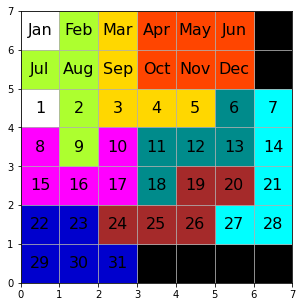

In [28]:
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta

def draw_puzzle():
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.xlim(0,7)
    plt.ylim(0,7)

    ax.set_aspect('equal', adjustable='box')
    ax.grid()

    dt = datetime.date(2000, 1, 1)

    ax.axvspan(6,7,5/7,7/7, color = "black", alpha = 1)
    ax.axvspan(3,7,0/7,1/7, color = "black", alpha = 1)

    # 月の描画
    for i in range(6):
        nm = dt + relativedelta(months=i)
        m = nm.strftime('%b')
        ax.text(0.5+i, 6.5, m, fontsize=16,
                            verticalalignment="center",
                            horizontalalignment="center")
    for i in range(6):
        nm = dt + relativedelta(months=6+i)
        m = nm.strftime('%b')
        ax.text(0.5+i, 5.5, m, fontsize=16,
                            verticalalignment="center",
                            horizontalalignment="center")
        
    # 日の描画
    for i in range(31):
        x = 0.5 + i%7
        y = 0.5 + abs(4-i//7)
        ax.text(x, y, str(i+1), fontsize=16,
                            verticalalignment="center",
                            horizontalalignment="center")
    
    return ax

def draw_blocks(ax, block_nums):
    # 初期化
    ax.axvspan(0,7,0,5, color = 'white', alpha = 1)
    ax.axvspan(6,7,5/7,7/7, color = "black", alpha = 1)
    ax.axvspan(3,7,0/7,1/7, color = "black", alpha = 1)

    colors = ['orangered', 'gold', 'darkcyan', 'magenta', 'aqua', 'brown', 'greenyellow', 'mediumblue',]
    for i in range(len(block_nums)):
        binary = format(block_nums[i], '049b')
        indexs = [i for i, x in enumerate(binary) if x == '1']
        for index in indexs:
            x = index%7
            y = 6 - index//7
            ax.axvspan(x,x+1,y/7,(y+1)/7, color = colors[i], alpha = 1)

    plt.pause(0.1)

ax = draw_puzzle()
block_nums = [62053687492608, 70926016184320, 566362112, 169607168, 270549376, 101888, 144044680282112, 12400]
draw_blocks(ax, block_nums)

---
# **ヒートマップ作成**
---

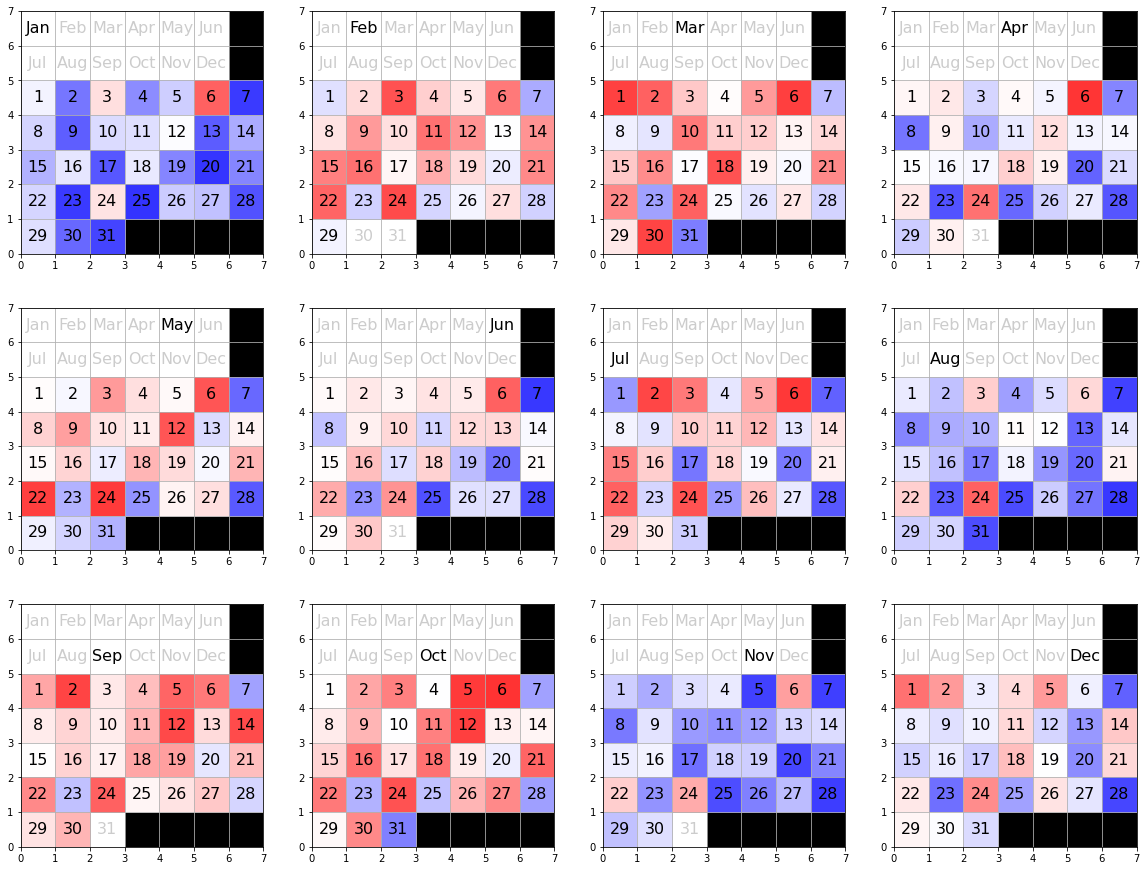

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import calendar
from dateutil.relativedelta import relativedelta

# カラーマップを作成
def gen_cmap_rgb(cols):
    nmax = float(len(cols)-1)
    cdict = {'red':[], 'green':[], 'blue':[]}
    for n, c in enumerate(cols):
        loc = n/nmax
        cdict['red'  ].append((loc, c[0], c[0]))
        cdict['green'].append((loc, c[1], c[1]))
        cdict['blue' ].append((loc, c[2], c[2]))
    return mpl.colors.LinearSegmentedColormap('cmap', cdict)

def draw(fig, dt, l):
    ax = fig.add_subplot(3,4,dt.month)
    plt.xlim(0,7)
    plt.ylim(0,7)
    plt.subplots_adjust(wspace=0.2, hspace=-0.4)

    ax.set_aspect('equal', adjustable='box')
    ax.grid()

    ax.axvspan(6,7,5/7,7/7, color = "black", alpha = 1)
    ax.axvspan(3,7,0/7,1/7, color = "black", alpha = 1)

    base_date = datetime.date(2000, 1, 1)

    # 月の描画
    for i in range(6):
        nm = base_date + relativedelta(months=i)
        m = nm.strftime('%b')
        a = 1 if dt.month == nm.month else 0.2
        ax.text(0.5+i, 6.5, m, fontsize=16,
                            verticalalignment="center",
                            horizontalalignment="center",
                            alpha = a)
    for i in range(6):
        nm = base_date + relativedelta(months=6+i)
        m = nm.strftime('%b')
        a = 1 if dt.month == nm.month else 0.2
        ax.text(0.5+i, 5.5, m, fontsize=16,
                            verticalalignment="center",
                            horizontalalignment="center",
                            alpha = a)
        
    # 日の描画
    for i in range(31):
        a = 1 if i < calendar.monthrange(dt.year, dt.month)[1] else 0.2
        x = 0.5 + i%7
        y = 0.5 + abs(4-i//7)
        ax.text(x, y, str(i+1), fontsize=16,
                            verticalalignment="center",
                            horizontalalignment="center",
                            alpha = a)
    
    # 順位による色付け
    cmap = gen_cmap_rgb([(0.2,0.2,1),(0.8,0.8,1),(1,1,1),(1,0.8,0.8),(1,0.2,0.2)])
    rgb = cmap(np.arange(256))
    for i in range(31):
        if i >= len(l):
            break
        x = i%7
        y = 4 - i//7
        ax.axvspan(x,x+1,y/7,(y+1)/7, color = rgb[l[i]])

fig = plt.figure(figsize=(20,20))

# Excelから読み取り
df = pd.read_excel('solve.xlsx')

#日付を型変換
df['date'] = '2000/' + df['date']
df['date'] = pd.to_datetime(df['date'])

# パターン数で順位付け、最大が255になるように調整
df['rank'] = df['pattern_num'].rank(method='min',ascending=False)
_max = df['rank'].max()
df['rank'] = df['rank'] * 255 / _max
df['rank'] = df['rank'].map(int)

for i in range(1, 13):
    dt = datetime.date(2000, i, 1)
    l = list(df[df['date'].dt.month == i]['rank'])
    draw(fig, dt, l)



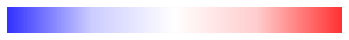

In [30]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# カラーマップを作成
def gen_cmap_rgb(cols):
    nmax = float(len(cols)-1)
    cdict = {'red':[], 'green':[], 'blue':[]}
    for n, c in enumerate(cols):
        loc = n/nmax
        cdict['red'  ].append((loc, c[0], c[0]))
        cdict['green'].append((loc, c[1], c[1]))
        cdict['blue' ].append((loc, c[2], c[2]))
    return mpl.colors.LinearSegmentedColormap('cmap', cdict)

cmap = gen_cmap_rgb([(0.2,0.2,1),(0.8,0.8,1),(1,1,1),(1,0.8,0.8),(1,0.2,0.2)])

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots()
ax.imshow(gradient, aspect=10, cmap=cmap)
ax.set_axis_off()